## Data Cleaning and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from bs4 import BeautifulSoup
import ast
import requests
import json
import time
import warnings
warnings.filterwarnings('ignore')

### Ratings Data

In [2]:
df_ratings = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [3]:
df_ratings.shape

(32000204, 4)

In [4]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [5]:
df_ratings.drop(columns=['timestamp'], inplace=True)

In [6]:
df_ratings.describe()

,userId,movieId,rating
count,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00
std,5.794905e+04,5.095816e+04,1.058986e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,5.005300e+04,1.233000e+03,3.000000e+00
50%,1.002970e+05,3.452000e+03,3.500000e+00
75%,1.504510e+05,4.419900e+04,4.000000e+00
max,2.009480e+05,2.927570e+05,5.000000e+00


In [7]:
df_ratings.nunique()

userId     200948
movieId     84432
rating         10
dtype: int64

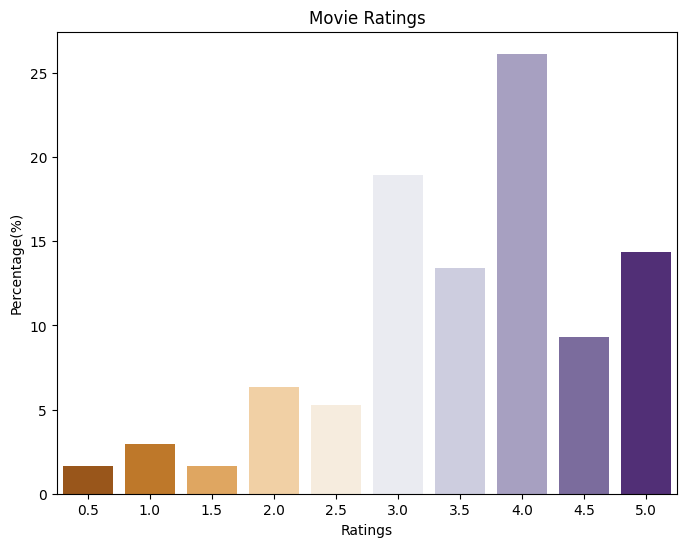

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x = df_ratings['rating'].value_counts(normalize=True).sort_index().index, y = df_ratings['rating'].value_counts(normalize=True).sort_index().values * 100, palette='PuOr')
plt.xlabel('Ratings')
plt.ylabel('Percentage(%)')
plt.title('Movie Ratings')
plt.savefig('D:/Movie_Recommendation/images/ratings.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

### Movies Data

In [11]:
df_movies = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [12]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
df_movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [14]:
df_movies.nunique()

movieId    87585
title      87382
genres      1798
dtype: int64

In [31]:
df_movies.sample()


,movieId,title,genres,year
61272,202842,Night of the Cobra Woman (1972),Horror|Thriller,1972


In [29]:
#Extract the year out of the movie title
df_movies['year'] = df_movies['title'].map(lambda x: x[-5:-1] if x[-5:-1].isnumeric() else (x[-6:-2] if x[-6:-2].isnumeric() else'0'))
df_movies['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
87580    2022
87581    2023
87582    2023
87583    1968
87584    2023
Name: year, Length: 87585, dtype: object

In [16]:
df_movies[df_movies['year'] == '0']

,movieId,title,genres,year
15038,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,0
25425,123619,Terrible Joe Moran,(no genres listed),0
26356,125571,The Court-Martial of Jackie Robinson,(no genres listed),0
26381,125632,In Our Garden,(no genres listed),0
26466,125958,Stephen Fry In America - New World,(no genres listed),0
...,...,...,...,...
86528,288927,Fortunes,Comedy,0
86634,289193,The Wonderful Story of Henry Sugar,Adventure|Children|Comedy,0
86833,289909,Rattler,(no genres listed),0
87074,290775,Being Romanian: A Family Journal,(no genres listed),0


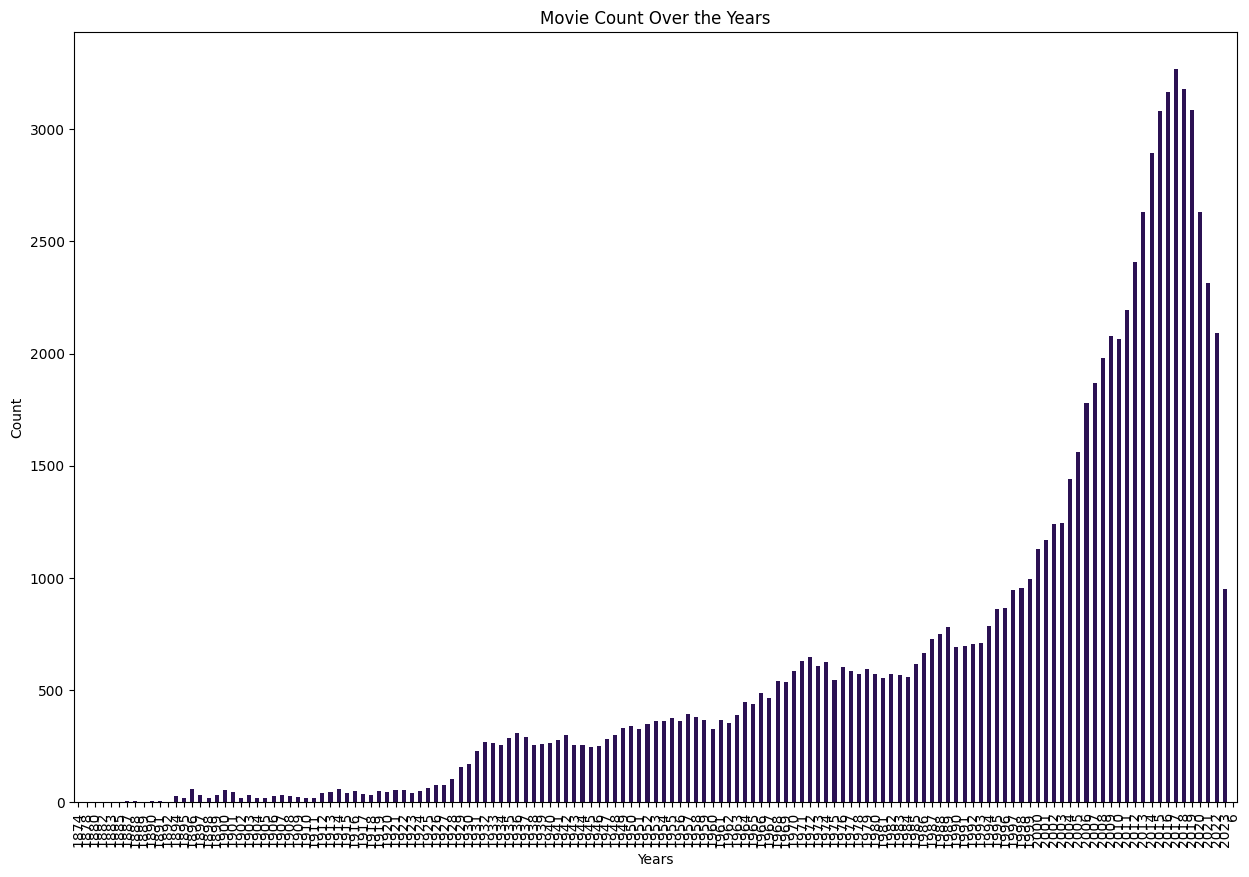

In [17]:
#Considered rows that do have year of release
plt.figure(figsize=(15,10))
df_movies[df_movies['year'] != '0']['year'].value_counts().sort_index(ascending=True).plot.bar(color='#2b1153')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Movie Count Over the Years');

In [18]:
#Combining data from movies dataset and ratings dataset. 
df = pd.merge(df_ratings, df_movies, left_on='movieId', right_on='movieId')
df.head()

,userId,movieId,rating,title,genres,year
0,1,17,4.0,Sense and Sensibility (1995),Drama|Romance,1995
1,1,25,1.0,Leaving Las Vegas (1995),Drama|Romance,1995
2,1,29,2.0,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
3,1,30,5.0,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,1995
4,1,32,5.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995


In [19]:
df.nunique()

userId     200948
movieId     84432
rating         10
title       84239
genres       1783
year          144
dtype: int64

Number of rated movies per user

In [20]:
#Top 10 users with most number of ratings
df.groupby('userId')['rating'].count().sort_values(ascending=False).head(10)

userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
10202      7748
198515     7594
49305      7488
22744      7372
7858       7322
Name: rating, dtype: int64

In [21]:
#Bottom 10 users with least number of ratings
df.groupby('userId')['rating'].count().sort_values(ascending=False).tail(10)

userId
137981    20
90018     20
30270     20
105793    20
116305    20
116298    20
72336     20
14723     20
83690     20
146604    20
Name: rating, dtype: int64

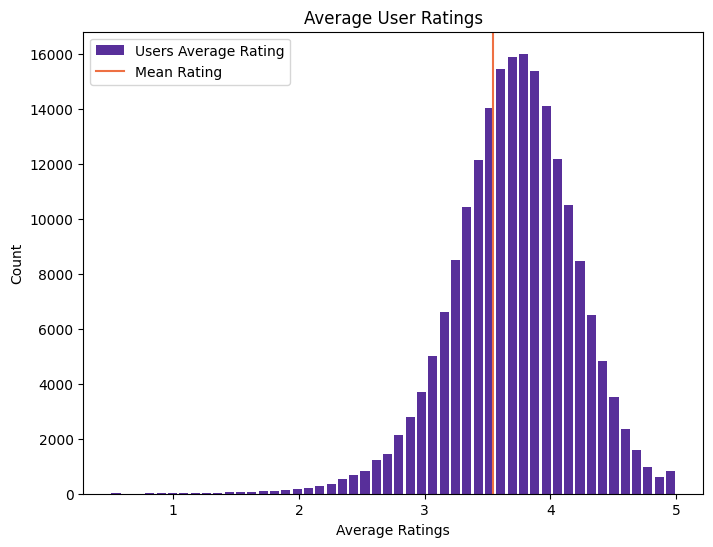

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df.groupby('userId')['rating'].mean(), color='#582f9a', bins=50, rwidth=0.8, label='Users Average Rating')
plt.axvline(df['rating'].mean(), color = '#ee7043', label = 'Mean Rating')
plt.xlabel('Average Ratings')
plt.ylabel('Count')
plt.title('Average User Ratings')
plt.legend()
plt.savefig('D:/Movie_Recommendation/images/average_rating.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

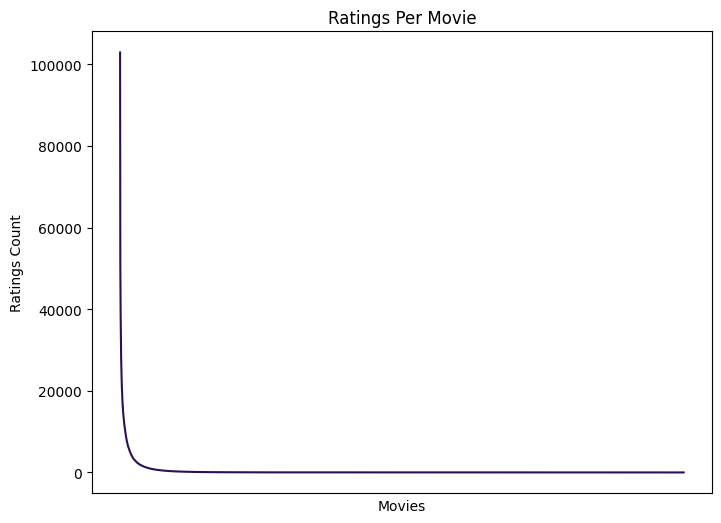

In [23]:
plt.figure(figsize=(8,6))
plt.plot(df.groupby('movieId')['rating'].count().sort_values(ascending=False).values, color ='#2b1153')
plt.xlabel('Movies')  #Movie Ids not arranged in a particular way
plt.ylabel('Ratings Count')
plt.title('Ratings Per Movie')
plt.xticks([])
plt.savefig('D:/Movie_Recommendation/images/ratings_per_movie.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

The plot above shows that there are less number of movies with more number of ratings and more number of movies with very few ratings. 

Extract the genres from each movie and create columns of genre. 

In [24]:
df['genres'].str.get_dummies().columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

There are movies with IMAX as a genre. IMAX is not really a genre, it is a movie viewing experience. As the goal of the project is to come up with recommendations on streaming services, IMAX doesn't particularly hold a value here. 

In [32]:
df[df['genres'].str.contains('IMAX')]['genres'].value_counts().sort_index()

genres
Action|Adventure|Animation|Children|Comedy|IMAX            8168
Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX      262
Action|Adventure|Animation|Fantasy|IMAX                    3419
Action|Adventure|Children|IMAX                             5251
Action|Adventure|Comedy|Sci-Fi|IMAX                         682
                                                          ...  
Horror|Thriller|IMAX                                       1023
IMAX                                                         30
Mystery|Sci-Fi|Thriller|IMAX                               6604
Sci-Fi|IMAX                                               37157
Sci-Fi|Thriller|IMAX                                       4239
Name: count, Length: 101, dtype: int64

In [33]:
df['genres'] = df['genres'].str.replace('IMAX','', regex=True)

In [34]:
#Saving dataframe to csv
df.to_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/ratings_title.csv', index=False)

In [35]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [36]:
df_movies[df_movies['genres'].str.contains('IMAX')]

,movieId,title,genres,year
32,33,Wings of Courage (1995),Adventure|Romance|IMAX,1995
36,37,Across the Sea of Time (1995),Documentary|IMAX,1995
148,150,Apollo 13 (1995),Adventure|Drama|IMAX,1995
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,1994
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,1991
...,...,...,...,...
22822,116253,IMAX: Coral Reef Adventure (2003),Children|Documentary|IMAX,2003
22935,116529,Stalingrad (2013),Action|Drama|War|IMAX,2013
23222,117442,The Monkey King (2014),Action|Adventure|Children|IMAX,2014
25089,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,2015


In [37]:
df_movies['genres'] = df_movies['genres'].str.replace('IMAX','', regex=True)

In [38]:
#One Hot Encoding genres column
df_genre = df['genres'].str.get_dummies()
df_genre

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000199,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
32000200,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
32000201,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32000202,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
genres = df_genre.sum().sort_values(ascending=False)
genres

Drama                 13973271
Comedy                11206926
Action                 9665213
Thriller               8679464
Adventure              7590522
Sci-Fi                 5717337
Romance                5524615
Crime                  5373051
Fantasy                3702759
Children               2731841
Mystery                2615322
Horror                 2492315
Animation              2214562
War                    1594110
Musical                1159516
Western                 596654
Documentary             427353
Film-Noir               304710
(no genres listed)       55498
dtype: int64

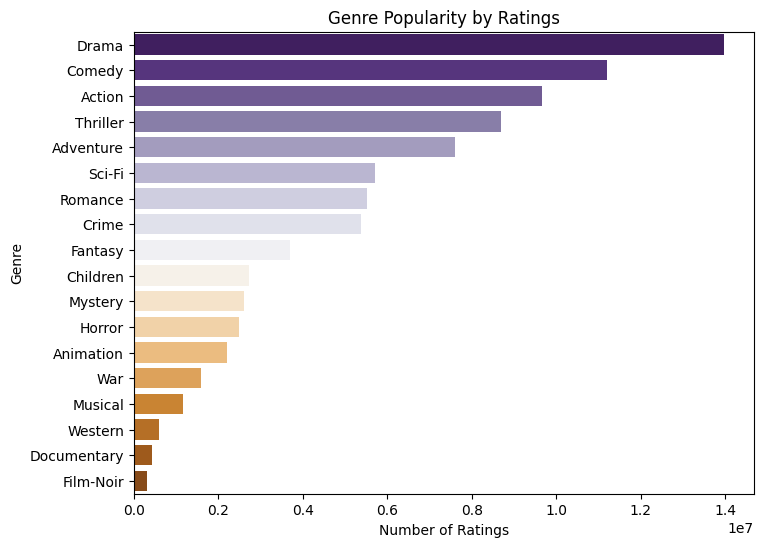

In [40]:
#Number of ratings per genre
plt.figure(figsize=(8,6))
sns.barplot(y = genres.index[:-1], x = genres.values[:-1], palette='PuOr_r')
plt.title('Genre Popularity by Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.savefig('D:/Movie_Recommendation/images/genre_popularity', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

In [41]:
df_genre.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [42]:
#Scale the genre columns per rating given by the users
for column in df_genre.columns:
    df_genre[column] *= df['rating']

In [43]:
df_genre

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000199,0.0,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0
32000200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32000201,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32000202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
ones = []
twos = []
threes = []
fours = []
fives = []
for column in df_genre.drop(columns=['(no genres listed)']).columns:
    ratings = df_genre[df_genre[column]!=0][column].value_counts(normalize=True).sort_index().values[1::2]
    ones.append(ratings[0]*100)
    twos.append(ratings[1]*100)
    threes.append(ratings[2]*100)
    fours.append(ratings[3]*100)
    fives.append(ratings[4]*100)

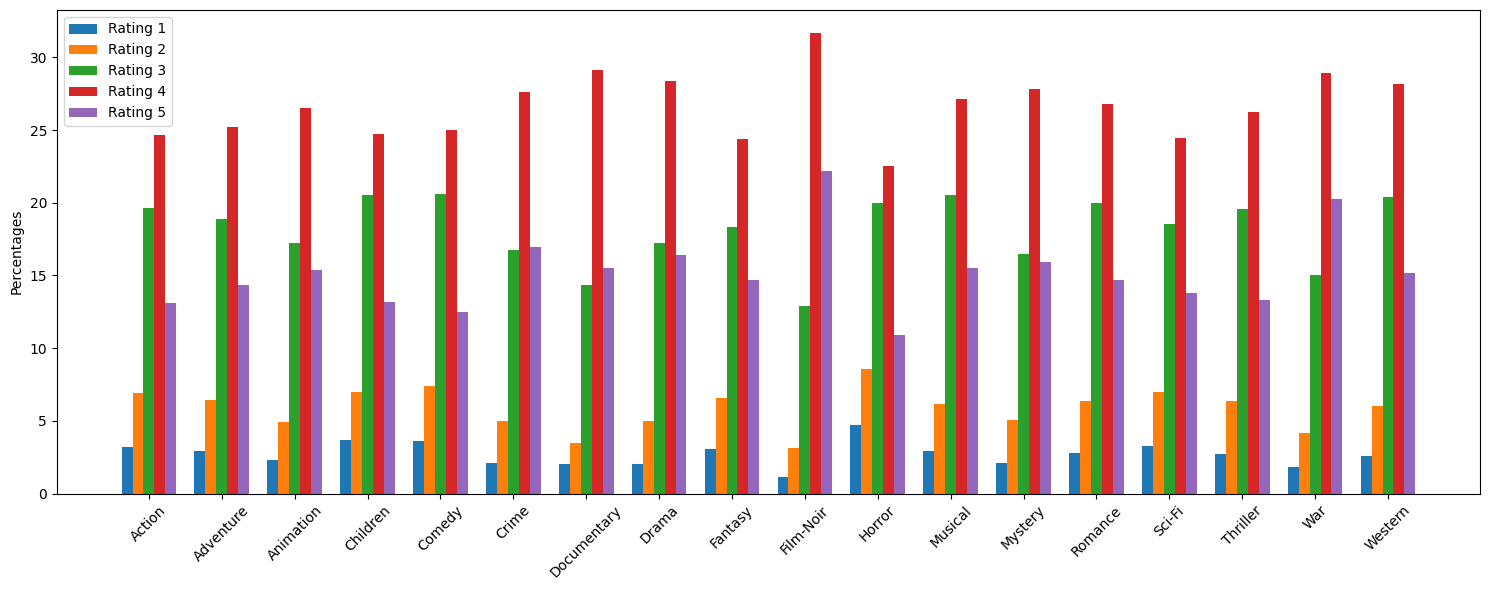

<Figure size 640x480 with 0 Axes>

In [54]:
labels = df_genre.drop(columns=['(no genres listed)']).columns.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width*2, ones, width, label='Rating 1')
rects2 = ax.bar(x - width, twos, width, label='Rating 2')
rects3 = ax.bar(x, threes, width, label='Rating 3')
rects4 = ax.bar(x + width, fours, width, label='Rating 4')
rects5 = ax.bar(x + width*2, fives, width, label='Rating 5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig('D:/Movie_Recommendation/images/ratings_per_genre.png');

### TMDB Movies Data

In [55]:
df_meta = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/movies_metadata.csv')
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [56]:
df_meta.shape

(45466, 24)

In [57]:
df_meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [58]:
#Keep necessary columns
df_meta = df_meta[['id','imdb_id', 'overview','tagline', 'vote_average', 'vote_count']]

In [59]:
df_meta.isnull().sum()

id                  0
imdb_id            17
overview          954
tagline         25054
vote_average        6
vote_count          6
dtype: int64

In [60]:
df_meta['tagline'].fillna('', inplace=True)
df_meta['overview'].fillna('', inplace=True)

In [62]:
#The link between movielens data and TMDB data
df_links = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [63]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     124
dtype: int64

In [64]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [65]:
df_links.dropna(inplace=True)

In [66]:
df_links['tmdbId'] = df_links['tmdbId'].map(lambda x: str(int(x)))

In [67]:
df_meta = pd.merge(df_meta, df_links, left_on = 'id', right_on = 'tmdbId')

In [68]:
df_meta.head()

,id,imdb_id,overview,tagline,vote_average,vote_count,movieId,imdbId,tmdbId
0,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,1,114709,862
1,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,2,113497,8844
2,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,3,113228,15602
3,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,4,114885,31357
4,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,5,113041,11862


In [69]:
df_meta.drop(columns=['imdbId','id'], inplace=True)

In [70]:
#Rearranging the columns
df_meta = df_meta[['movieId','tmdbId','imdb_id', 'overview', 'tagline', 'vote_average',
       'vote_count']]

In [71]:
df_meta['movieId'] = df_meta['movieId'].map(str)

In [72]:
df_meta.shape

(42990, 7)

In [73]:
df_meta.nunique()

movieId         42951
tmdbId          42924
imdb_id         42915
overview        41858
tagline         19356
vote_average       90
vote_count       1815
dtype: int64

In [74]:
df_meta.drop_duplicates(inplace=True)

In [75]:
df_meta.reset_index(inplace=True)

In [76]:
df_meta.drop(columns=['index'], inplace=True)

In [77]:
df_movies['movieId'] = df_movies['movieId'].map(str)

In [78]:
df_meta = pd.merge(df_movies, df_meta, left_on = 'movieId', right_on='movieId')

In [79]:
df_meta.nunique()

movieId         42951
title           42909
genres           1497
year              136
tmdbId          42924
imdb_id         42915
overview        41858
tagline         19356
vote_average       90
vote_count       1815
dtype: int64

In [80]:
df_meta.shape

(42955, 10)

Looks like there are some duplicates in the dataframe. 

In [81]:
df_meta[df_meta['title'].duplicated()]

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
4100,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,144.0
5116,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,90.0
9008,26982,Men with Guns (1997),Drama,1997,44641,tt0119657,Dr. Fuentes is a medical professor approaching...,,6.3,3.0
12825,64997,War of the Worlds (2005),Action|Sci-Fi,2005,34812,tt0449040,In this modern retelling of H.G. Wells' classi...,,4.4,10.0
12899,65665,Hamlet (2000),Drama,2000,125705,tt0243951,"To be or not to be, etc.",,0.0,0.0
13091,67459,Chaos (2005),Crime|Drama|Horror,2005,39914,tt0405977,Emily and her friend Angelica go to a rave in ...,The most brutal movie ever made,4.4,7.0
21849,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy,1992,343693,tt0827990,,,5.5,7.0
22150,115777,Beneath (2013),Horror,2013,257874,tt2991296,A crew of coal miners becomes trapped 600 feet...,,5.2,61.0
23716,121586,Paradise (2013),Romance,2013,216440,tt2866676,"Carmen and Alfredo live a happy, quiet life in...",,5.3,10.0
24660,124757,Hostage (2005),Crime|Drama|Thriller,2005,211930,tt0465552,Inspired by the real-life story of a bus hijac...,I want only young people in the bus. If I get ...,8.0,1.0


In [82]:
df_meta[df_meta['title'] == 'Pokémon 3: The Movie (2001)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
4099,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,143.0
4100,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,144.0


In [83]:
df_meta[df_meta['title'] == 'Clockstoppers (2002)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
5115,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,89.0
5116,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,90.0
31253,144426,Clockstoppers (2002),Adventure|Children|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,89.0
31254,144426,Clockstoppers (2002),Adventure|Children|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,90.0


In [84]:
df_meta[df_meta['title'] == 'Confessions of a Dangerous Mind (2002)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
5848,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,2002,4912,tt0270288,"Television made him famous, but his biggest hi...",Some things are better left top secret.,6.6,281.0
31336,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,2002,4912,tt0270288,"Television made him famous, but his biggest hi...",Some things are better left top secret.,6.6,281.0


In [85]:
df_meta[df_meta['title'] == 'Emma (1996)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
810,838,Emma (1996),Comedy|Drama|Romance,1996,3573,tt0116191,Emma Woodhouse is a congenial young lady who d...,Cupid is armed and dangerous!,6.7,152.0


In [86]:
df_meta[df_meta['title'] == 'War of the Worlds (2005)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
9989,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller,2005,74,tt0407304,Ray Ferrier is a divorced dockworker and less-...,They're already here.,6.2,2397.0
12825,64997,War of the Worlds (2005),Action|Sci-Fi,2005,34812,tt0449040,In this modern retelling of H.G. Wells' classi...,,4.4,10.0


In [87]:
df_meta.drop(index=[3148,3760,9069,5590,6912], inplace=True)

In [88]:
df_meta.reset_index(inplace=True)

In [89]:
df_meta.drop(columns=['index'], inplace=True)

### IMDb Rating Data

In [94]:
df_imdb = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/title-ratings.tsv', sep='\t')
df_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1914
1,tt0000002,5.8,259
2,tt0000003,6.5,1720
3,tt0000004,5.6,172
4,tt0000005,6.2,2537


In [96]:
df_meta = pd.merge(df_meta, df_imdb, how='left', left_on='imdb_id', right_on='tconst')
df_meta.head()

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count,tconst,averageRating,numVotes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,tt0114709,8.3,984769.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,tt0113497,7.0,344106.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,tt0113228,6.6,27772.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,tt0114885,5.9,11077.0
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,tt0113041,6.0,38577.0


In [97]:
df_meta.drop(columns=['tconst'], inplace=True)

In [98]:
df_meta.rename(columns={'movieId':'movie_id','tmdbId': 'tmdb_id','vote_average': 'tmdb_rating',
                        'vote_count': 'tmdb_votes', 'averageRating': 'imdb_rating', 'numVotes': 'imdb_votes'}, inplace=True)

In [99]:
df_meta.head()

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,984769.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,344106.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,27772.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,11077.0
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,38577.0


In [100]:
df_meta.isnull().sum()

movie_id        0
title           0
genres          0
year            0
tmdb_id         0
imdb_id         9
overview        0
tagline         0
tmdb_rating     3
tmdb_votes      3
imdb_rating    97
imdb_votes     97
dtype: int64

In [131]:
indices = df_meta[df_meta['imdb_id'].isnull()].index


In [105]:
type(indices[0])

numpy.int64

In [106]:
df_meta.loc[indices[0],'imdb_id'] = 'tt0490048'

In [112]:
df_meta.loc[indices[1],'imdb_id'] = 'tt1325753'

In [119]:
df_meta.loc[indices[2],'imdb_id'] = 'tt1000000'
df_meta.loc[indices[3],'imdb_id'] = 'tt1000000'
df_meta.loc[indices[4],'imdb_id'] = 'tt1000000'
df_meta.loc[indices[5],'imdb_id'] = 'tt1000000'
df_meta.loc[indices[6],'imdb_id'] = 'tt1000000'



In [120]:
df_meta.isnull().sum()

movie_id        0
title           0
genres          0
year            0
tmdb_id         0
imdb_id         1
overview        0
tagline         0
tmdb_rating     3
tmdb_votes      3
imdb_rating    97
imdb_votes     97
dtype: int64

In [121]:
indices = df_meta[df_meta['imdb_id'].isnull()].index

In [122]:
type(indices[0])

numpy.int64

In [123]:
#IMDB ids with missing rating data
imdb_ids = df_meta[df_meta['imdb_rating'].isnull()]['imdb_id'].values

In [124]:
imdb_ids

array(['tt0099697', 'tt0058333', 'tt0053219', 'tt0092655', 'tt0064285',
       'tt0050490', 'tt0049301', 'tt0066090', 'tt0047542', 'tt0014142',
       'tt0025301', 'tt0490048', 'tt0127392', 'tt0023551', 'tt0016914',
       'tt0065542', 'tt0060550', 'tt1127347', 'tt1325753', nan,
       'tt0465461', 'tt0048990', 'tt3962302', 'tt0086546', 'tt1325753',
       'tt0061868', 'tt1520841', 'tt2069830', 'tt0068371', 'tt2397619',
       'tt0072229', 'tt1000000', 'tt0428959', 'tt0181907', 'tt0059076',
       'tt2229399', 'tt3384034', 'tt0016938', 'tt1138481', 'tt0088766',
       'tt3534602', 'tt3300942', 'tt1604139', 'tt0062151', 'tt3416042',
       'tt5309926', 'tt4693418', 'tt1541005', 'tt3038664', 'tt2222430',
       'tt0211328', 'tt0040593', 'tt0124288', 'tt0326722', 'tt1000000',
       'tt5819280', 'tt5232920', 'tt0271446', 'tt4157292', 'tt3253740',
       'tt5570934', 'tt3784444', 'tt4336182', 'tt1548598', 'tt1000000',
       'tt3620880', 'tt1961650', 'tt1000000', 'tt0430447', 'tt0241267',


In [126]:
import requests
import json
import time
from bs4 import BeautifulSoup

imdb_list = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
                   (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

for imdb_id in imdb_ids:
    time.sleep(3)
    url = f'https://www.imdb.com/title/{imdb_id}/?ref_=fn_al_tt_1'
    imdb_dict = {'tconst': imdb_id}

    try:
        res = requests.get(url, headers=headers)
        soup = BeautifulSoup(res.text, 'lxml')
        script = soup.find('script', {'id': '__NEXT_DATA__'})

        if not script:
            raise ValueError("__NEXT_DATA__ script not found")

        data = json.loads(script.contents[0])
        rating_info = data['props']['pageProps']['aboveTheFoldData'].get('ratingsSummary', {})

        imdb_dict['averageRating'] = rating_info.get('aggregateRating', 0)
        imdb_dict['numVotes'] = rating_info.get('voteCount', 0)

    except Exception as e:
        print(f"Failed for {imdb_id}: {e}")
        imdb_dict['averageRating'] = 0
        imdb_dict['numVotes'] = 0

    imdb_list.append(imdb_dict)


Failed for nan: 'aboveTheFoldData'
Failed for tt3416042: 'aboveTheFoldData'


In [132]:
imdb_list

[{'tconst': 'tt0099697', 'averageRating': 5, 'numVotes': 13535},
 {'tconst': 'tt0058333', 'averageRating': 6.9, 'numVotes': 17452},
 {'tconst': 'tt0053219', 'averageRating': 5.7, 'numVotes': 5485},
 {'tconst': 'tt0092655', 'averageRating': 5.8, 'numVotes': 948},
 {'tconst': 'tt0064285', 'averageRating': 7.5, 'numVotes': 9294},
 {'tconst': 'tt0050490', 'averageRating': 7.3, 'numVotes': 10103},
 {'tconst': 'tt0049301', 'averageRating': 6.1, 'numVotes': 2719},
 {'tconst': 'tt0066090', 'averageRating': 6.8, 'numVotes': 4570},
 {'tconst': 'tt0047542', 'averageRating': 6.8, 'numVotes': 7832},
 {'tconst': 'tt0014142', 'averageRating': 7.2, 'numVotes': 6508},
 {'tconst': 'tt0025301', 'averageRating': 7.5, 'numVotes': 6027},
 {'tconst': 'tt0490048', 'averageRating': 8.2, 'numVotes': 2591},
 {'tconst': 'tt0127392', 'averageRating': 8.2, 'numVotes': 21112},
 {'tconst': 'tt0023551', 'averageRating': 6.9, 'numVotes': 8632},
 {'tconst': 'tt0016914', 'averageRating': 6.8, 'numVotes': 858},
 {'tconst'

In [133]:
indices = df_meta[df_meta['imdb_rating'].isnull()][['imdb_id', 'imdb_rating','imdb_votes']].index

In [134]:
df_meta.iloc[indices][['imdb_id', 'imdb_rating','imdb_votes']]

,imdb_id,imdb_rating,imdb_votes
1995,tt0099697,NaN,NaN
2659,tt0058333,NaN,NaN
3783,tt0053219,NaN,NaN
3945,tt0092655,NaN,NaN
4566,tt0064285,NaN,NaN
...,...,...,...
42927,tt4287434,NaN,NaN
42928,tt5950094,NaN,NaN
42933,tt3962302,NaN,NaN
42946,tt0241267,NaN,NaN


In [135]:
for i in range(len(indices)):
    df_meta.loc[indices[i], 'imdb_rating'] = imdb_list[i]['averageRating'] 
    df_meta.loc[indices[i], 'imdb_votes'] = imdb_list[i]['numVotes'] 

In [136]:
df_meta.iloc[indices][['imdb_id', 'imdb_rating','imdb_votes']]

,imdb_id,imdb_rating,imdb_votes
1995,tt0099697,5.0,13535.0
2659,tt0058333,6.9,17452.0
3783,tt0053219,5.7,5485.0
3945,tt0092655,5.8,948.0
4566,tt0064285,7.5,9294.0
...,...,...,...
42927,tt4287434,7.3,2565.0
42928,tt5950094,6.4,2338.0
42933,tt3962302,7.3,447.0
42946,tt0241267,5.8,1575.0


In [143]:
df_meta = df_meta[~df_meta['imdb_rating'].isin(['tt3416042', 'nan'])]


In [144]:
df_meta.isnull().sum()

movie_id        0
title           0
genres          0
year            0
tmdb_id         0
imdb_id         1
overview        0
tagline         0
tmdb_rating     3
tmdb_votes      3
imdb_rating    13
imdb_votes      0
dtype: int64

<Figure size 800x600 with 0 Axes>

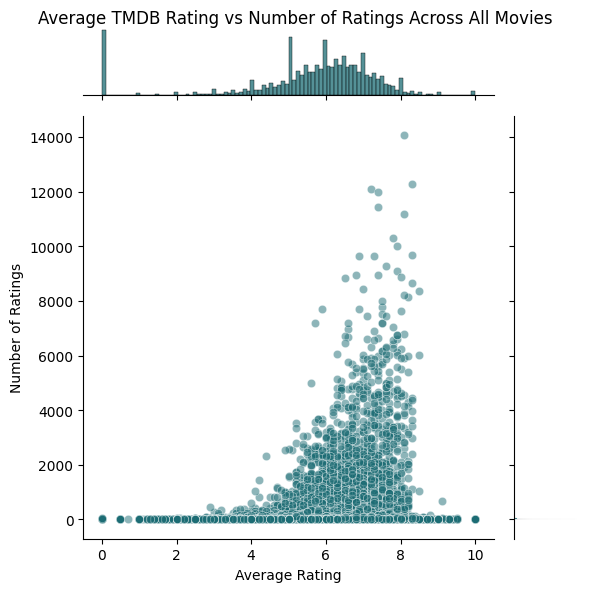

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))  # Not needed for jointplot, but won't break anything
p = sns.jointplot(
    data=df_meta,
    x='tmdb_rating',
    y='tmdb_votes',
    kind='scatter',
    color='#1c6c74',
    alpha=0.5
)

p.fig.suptitle('Average TMDB Rating vs Number of Ratings Across All Movies', fontsize=12)
p.set_axis_labels(xlabel='Average Rating', ylabel='Number of Ratings')

# Adjust layout to avoid overlap
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

# Save the plot
p.fig.savefig('D:/Movie_Recommendation/images/tmdb_ratings.png', facecolor='w', transparent=False, dpi=1000, bbox_inches='tight')


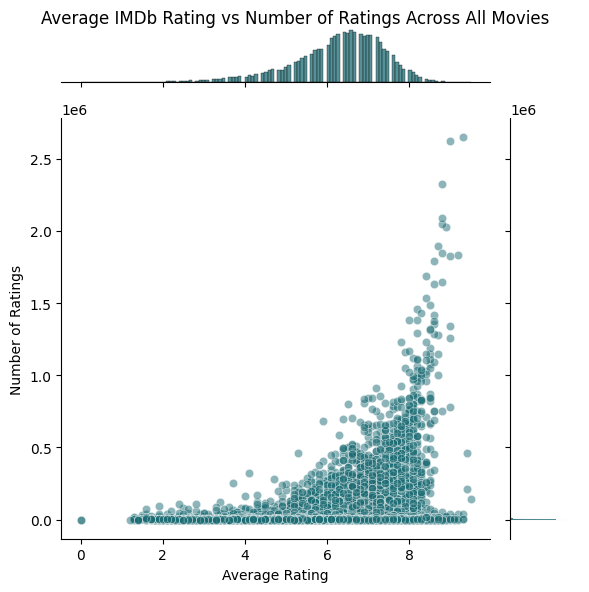

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use jointplot directly — no need for plt.figure()
p = sns.jointplot(
    data=df_meta,
    x='imdb_rating',
    y='imdb_votes',
    kind='scatter',
    color='#1c6c74',
    alpha=0.5
)

# Add title
p.fig.suptitle('Average IMDb Rating vs Number of Ratings Across All Movies', fontsize=12)

# Label axes
p.set_axis_labels(xlabel='Average Rating', ylabel='Number of Ratings')

# Adjust layout
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

# Save plot
p.fig.savefig('D:/Movie_Recommendation/images/imdb_ratings.png', facecolor='w', transparent=False, dpi=1000, bbox_inches='tight')


### Keywords Data

In [153]:
df_keywords = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/keywords.csv')
df_keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [154]:
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [155]:
df_meta['tmdb_id'] = df_meta['tmdb_id'].map(str)

In [156]:
df_keywords['id'] = df_keywords['id'].map(str)

In [157]:
df_keywords.nunique()

id          45432
keywords    25989
dtype: int64

In [158]:
df_keywords.shape

(46419, 2)

In [159]:
df_keywords[df_keywords['id'].duplicated()]

,id,keywords
1465,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
9165,5511,"[{'id': 90, 'name': 'paris'}, {'id': 1010, 'na..."
9327,23305,[]
12066,14788,"[{'id': 9826, 'name': 'murder'}, {'id': 10183,..."
13375,141971,[]
...,...,...
40994,298721,"[{'id': 1227, 'name': 'cemetery'}, {'id': 1261..."
41230,97995,[]
45774,10991,"[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
45779,12600,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."


In [160]:
df_keywords[df_keywords['id'] == '141971']

,id,keywords
13261,141971,[]
13375,141971,[]
16764,141971,[]


In [161]:
df_keywords[df_keywords['id'] == '39436']

,id,keywords
35717,39436,"[{'id': 11039, 'name': 'giallo'}, {'id': 15167..."
36674,39436,"[{'id': 11039, 'name': 'giallo'}, {'id': 15167..."


In [162]:
df_keywords.drop_duplicates(inplace=True)

In [163]:
#Merging the main data with the keywords data on tmdbId column 
df_meta = pd.merge(df_meta, df_keywords, left_on = 'tmdb_id', right_on = 'id')

In [164]:
df_meta.drop(columns = ['id'], inplace=True)

In [165]:
df_meta.shape

(42949, 13)

In [166]:
df_meta

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,984769.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,344106.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,27772.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,11077.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,38577.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42944,273853,Players (2012),Action|Crime|Thriller,2012,83382,tt1784589,Learning of a fortune in gold being secretly s...,,4.2,10.0,4.2,4606.0,"[{'id': 9714, 'name': 'remake'}, {'id': 10051,..."
42945,275753,The Boxing Cats (1894),Documentary,1894,159898,tt0241267,"""A glove contest between trained cats. A very ...",,6.3,6.0,5.8,1575.0,[]
42946,280218,Avatar: The Way of Water (2022),Action|Adventure|Sci-Fi,2022,76600,tt1630029,A sequel to Avatar (2009).,,0.0,58.0,7.5,539799.0,"[{'id': 9663, 'name': 'sequel'}, {'id': 10158,..."
42947,283525,Beck 27 - Room 302 (2015),Crime|Drama|Mystery|Thriller,2015,315360,tt4186386,The body of a young woman is found in a Stockh...,,6.4,7.0,6.3,1620.0,"[{'id': 209680, 'name': 'gunvald'}, {'id': 209..."


The `keywords` column consists of string of list of dictionaries. `ast.literal_eval()` is used to safely evaluate an expression or a string containing Python literal (raw data). This step skips the need to parse data. 

In [167]:
df_meta['keywords'] = df_meta['keywords'].map(ast.literal_eval)
df_meta['keywords'].head()

0    [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1    [{'id': 10090, 'name': 'board game'}, {'id': 1...
2    [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3    [{'id': 818, 'name': 'based on novel'}, {'id':...
4    [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
Name: keywords, dtype: object

The following code separates all the keywords from list of dictionaries and puts them together. 

In [168]:
df_meta['keywords'] = df_meta['keywords'].map(lambda x : ' '.join([i['name'] for i in x]) if len(x)>0 else '')
df_meta['keywords']

0        jealousy toy boy friendship friends rivalry bo...
1        board game disappearance based on children's b...
2         fishing best friend duringcreditsstinger old men
3        based on novel interracial relationship single...
4        baby midlife crisis confidence aging daughter ...
                               ...                        
42944                                remake heist betrayal
42945                                                     
42946                           sequel alien planet avatar
42947                                  gunvald beck martin
42948                           family gunvald beck martin
Name: keywords, Length: 42949, dtype: object

In [169]:
#Check for nulls
df_meta['keywords'].isnull().sum()

np.int64(0)

### Cast And Crew Data

In [172]:
df_cast = pd.read_csv('D:/Movie_Recommendation/CineSage/Data Collection/ml-32m/credits.csv')
df_cast.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [173]:
df_cast['id'] = df_cast['id'].map(str)

In [174]:
#Filter out that dataframe with requiered movieIds
df_cast = df_cast[df_cast['id'].isin(df_meta['tmdb_id'])]

In [175]:
df_cast.shape

(42959, 3)

The following code not only cleans the `crew` column to extract director, but also clubs together a director's first and last name so that they are not considered separate while vectorizing the column. 

In [176]:
df_cast['crew'] = df_cast['crew'].map(ast.literal_eval)

In [177]:
def get_director(row):
    for dictionary in row:
        if dictionary['job'] == 'Director':
            return ''.join([name for name in dictionary['name'].split()])
    return ''

In [178]:
#Check the function
get_director(df_cast['crew'].values[0])

'JohnLasseter'

In [179]:
df_cast['director'] = df_cast['crew'].map(get_director)

In [180]:
df_cast['director'].isnull().sum()

np.int64(0)

The following code extracts the cast of the movie. Every movie has multiple casts members, but the actor playing the lead characters are always mentioned before the actors playing supporting characters. More often than not, a user is more likely to choose a movie based on the lead actors. Hence the following code extracts first four actors from the cast dictionary. 

In [181]:
df_cast['cast'] = df_cast['cast'].map(ast.literal_eval)

In [182]:
def get_cast(row):
    cast = ''
    for dictionary in row:
        if int(dictionary['order']) in range(0,4):  #Selecting top 4 cast members
            cast += ''.join([name for name in dictionary['name'].split()]) + ' '
    return cast


In [183]:
#Check the function
get_cast(df_cast['cast'].values[6])

'HarrisonFord JuliaOrmond GregKinnear AngieDickinson '

In [184]:
df_cast['cast'] = df_cast['cast'].map(get_cast)

In [185]:
df_cast.isnull().sum()

cast        0
crew        0
id          0
director    0
dtype: int64

In [186]:
df_cast.drop(columns=['crew'], inplace=True)

In [187]:
df_meta = pd.merge(df_meta, df_cast, left_on='tmdb_id', right_on='id')

In [188]:
df_meta.head()

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords,cast,id,director
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,984769.0,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles JimVarney,862,JohnLasseter
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,344106.0,board game disappearance based on children's b...,RobinWilliams JonathanHyde KirstenDunst Bradle...,8844,JoeJohnston
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,27772.0,fishing best friend duringcreditsstinger old men,WalterMatthau JackLemmon Ann-Margret SophiaLoren,15602,HowardDeutch
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,11077.0,based on novel interracial relationship single...,WhitneyHouston AngelaBassett LorettaDevine Lel...,31357,ForestWhitaker
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,38577.0,baby midlife crisis confidence aging daughter ...,SteveMartin DianeKeaton MartinShort KimberlyWi...,11862,CharlesShyer


In [189]:
df_meta.drop(columns=['id'], inplace=True)

In [190]:
df_meta

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords,cast,director
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,984769.0,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles JimVarney,JohnLasseter
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,344106.0,board game disappearance based on children's b...,RobinWilliams JonathanHyde KirstenDunst Bradle...,JoeJohnston
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,27772.0,fishing best friend duringcreditsstinger old men,WalterMatthau JackLemmon Ann-Margret SophiaLoren,HowardDeutch
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,11077.0,based on novel interracial relationship single...,WhitneyHouston AngelaBassett LorettaDevine Lel...,ForestWhitaker
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,38577.0,baby midlife crisis confidence aging daughter ...,SteveMartin DianeKeaton MartinShort KimberlyWi...,CharlesShyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42999,273853,Players (2012),Action|Crime|Thriller,2012,83382,tt1784589,Learning of a fortune in gold being secretly s...,,4.2,10.0,4.2,4606.0,remake heist betrayal,AbhishekBachchan BipashaBasu BobbyDeol SonamKa...,MastanAlibhaiBurmawalla
43000,275753,The Boxing Cats (1894),Documentary,1894,159898,tt0241267,"""A glove contest between trained cats. A very ...",,6.3,6.0,5.8,1575.0,,HenryWelton,WilliamHeise
43001,280218,Avatar: The Way of Water (2022),Action|Adventure|Sci-Fi,2022,76600,tt1630029,A sequel to Avatar (2009).,,0.0,58.0,7.5,539799.0,sequel alien planet avatar,KateWinslet ZoeSaldana SamWorthington Sigourne...,JamesCameron
43002,283525,Beck 27 - Room 302 (2015),Crime|Drama|Mystery|Thriller,2015,315360,tt4186386,The body of a young woman is found in a Stockh...,,6.4,7.0,6.3,1620.0,gunvald beck martin,PeterHaber MikaelPersbrandt IngvarHirdwall,MårtenKlingberg


In [191]:
#Drop duplicate rows
df_meta.drop_duplicates(inplace=True)

In [192]:
df_meta['director'].value_counts()

director
                      791
JohnFord               66
MichaelCurtiz          65
WernerHerzog           54
AlfredHitchcock        53
                     ... 
LewisH.Moomaw           1
Jean-PhilippeDuval      1
CarolineZelder          1
SouleymaneCissé         1
ArthurRomeo             1
Name: count, Length: 16804, dtype: int64

In [194]:
# Only include directors with at least 3 movies
director_ratings = (
    df_meta.groupby('director')
           .filter(lambda x: len(x) >= 3)
           .groupby('director')['tmdb_rating']
           .mean()
           .sort_values(ascending=False)
)


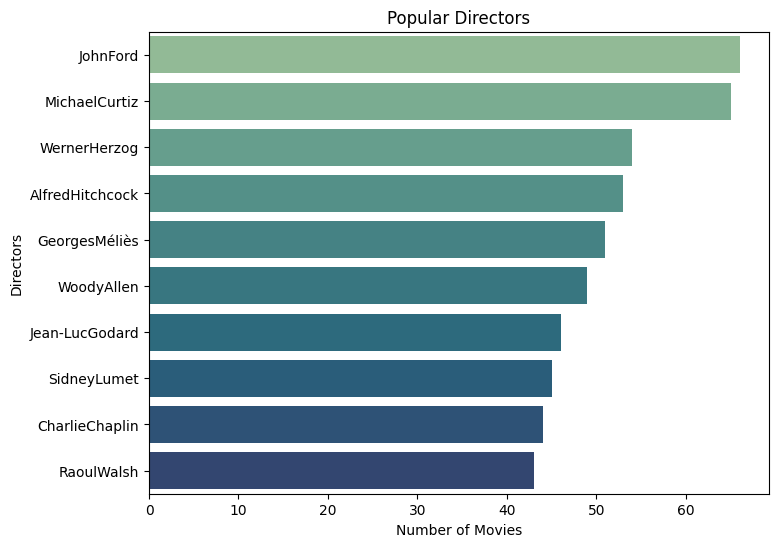

In [195]:
plt.figure(figsize=(8,6))
sns.barplot(y = df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='').index, 
           x = df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='').values, palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Popular Directors');

In [196]:
df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='')

director
JohnFord           66
MichaelCurtiz      65
WernerHerzog       54
AlfredHitchcock    53
GeorgesMéliès      51
WoodyAllen         49
Jean-LucGodard     46
SidneyLumet        45
CharlieChaplin     44
RaoulWalsh         43
Name: tmdb_rating, dtype: int64

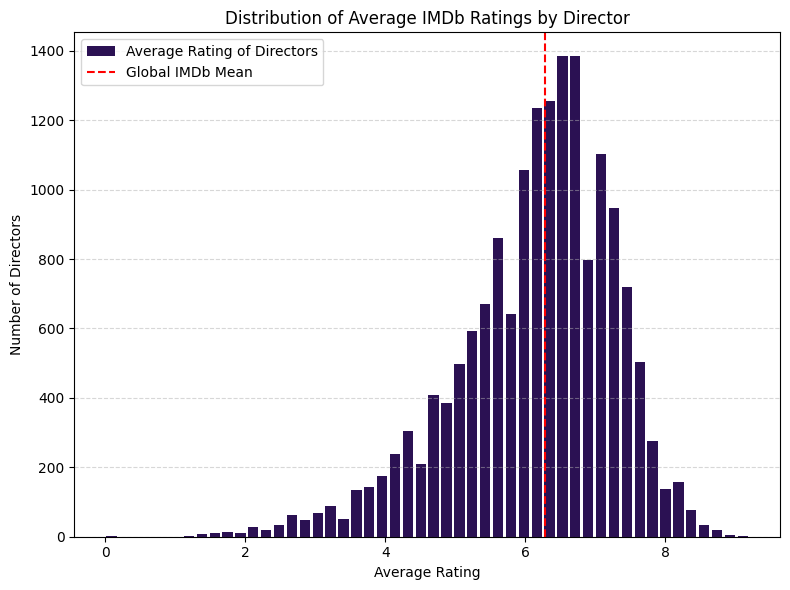

In [198]:
import matplotlib.pyplot as plt

# Step 1: Compute average rating per director
director_avg_ratings = df_meta.groupby('director')['imdb_rating'].mean()

# Step 2: Plot histogram
plt.figure(figsize=(8,6))
plt.hist(
    director_avg_ratings,
    bins=50,
    rwidth=0.8,
    color='#2b1153',
    label='Average Rating of Directors'
)

# Step 3: Plot global average rating line
plt.axvline(df_meta['imdb_rating'].mean(), color='r', linestyle='--', linewidth=1.5, label='Global IMDb Mean')

# Step 4: Add labels and legend
plt.xlabel('Average Rating')
plt.ylabel('Number of Directors')
plt.title('Distribution of Average IMDb Ratings by Director')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


In [199]:
df_meta['cast']


0                  TomHanks TimAllen DonRickles JimVarney 
1        RobinWilliams JonathanHyde KirstenDunst Bradle...
2        WalterMatthau JackLemmon Ann-Margret SophiaLoren 
3        WhitneyHouston AngelaBassett LorettaDevine Lel...
4        SteveMartin DianeKeaton MartinShort KimberlyWi...
                               ...                        
42999    AbhishekBachchan BipashaBasu BobbyDeol SonamKa...
43000                                         HenryWelton 
43001    KateWinslet ZoeSaldana SamWorthington Sigourne...
43002          PeterHaber MikaelPersbrandt IngvarHirdwall 
43003          PeterHaber MikaelPersbrandt IngvarHirdwall 
Name: cast, Length: 42950, dtype: object

In [200]:
df_meta.to_csv('D:/Movie_Recommendation/analyzed_data/content.csv', index=False)